In [1]:
!mkdir -p ~/.kaggle
!cp kaggle. json ~/ kaggle/

cp: target 'kaggle/' is not a directory


In [2]:
!kaggle datasets download -d alessiocorrado99/animals10

Dataset URL: https://www.kaggle.com/datasets/alessiocorrado99/animals10
License(s): GPL-2.0
 99% 582M/586M [00:16<00:00, 40.6MB/s]
100% 586M/586M [00:16<00:00, 37.2MB/s]


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Conv2D,MaxPooling2D, Flatten, BatchNormalization , Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers

In [4]:
zf = zipfile.ZipFile('/content/animals10.zip')
zf.extractall('/content')
zf.close()

In [5]:
from keras.applications.vgg16 import VGG16

In [6]:
tl = VGG16(
    weights = 'imagenet',
    include_top = False,
    input_shape = (256,256,3)
)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [7]:
train = keras.utils.image_dataset_from_directory(
    directory = '/content/raw-img',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256 , 256)
)

Found 26179 files belonging to 10 classes.


In [8]:
def process(img, lab):
  img = tf.cast(img/255., tf.float32)
  return img , lab
train = train.map(process)

In [10]:
validation_size = 0.2
train_size = int((1 - validation_size) * len(train))


train_dataset = train.take(train_size)
validation_dataset = train.skip(train_size)

In [12]:
model = Sequential()
model.add(tl)
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
tl.trainable = False

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
early_stopping = EarlyStopping(
    monitor = 'val_loss',
    patience = 3,
    restore_best_weights= True
)
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=[early_stopping]
)

Epoch 1/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 211s 290ms/step - accuracy: 0.6784 - loss: 1.0153 - val_accuracy: 0.8360 - val_loss: 0.4914
Epoch 2/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 190s 290ms/step - accuracy: 0.8815 - loss: 0.3540 - val_accuracy: 0.8521 - val_loss: 0.4906
Epoch 3/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 172s 245ms/step - accuracy: 0.9309 - loss: 0.2086 - val_accuracy: 0.8300 - val_loss: 0.5941
Epoch 4/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 190s 290ms/step - accuracy: 0.9469 - loss: 0.1574 - val_accuracy: 0.8578 - val_loss: 0.5313
Epoch 5/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 161s 246ms/step - accuracy: 0.9668 - loss: 0.0956 - val_accuracy: 0.8728 - val_loss: 0.5278


In [13]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 8, 8, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       4,194,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,324,704 (104.24 MB)

 Trainable params: 4,203,338 (16.03 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 8,406,678 (32.07 MB)

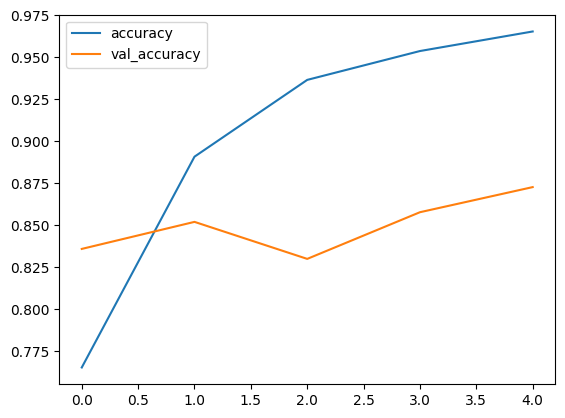

In [14]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

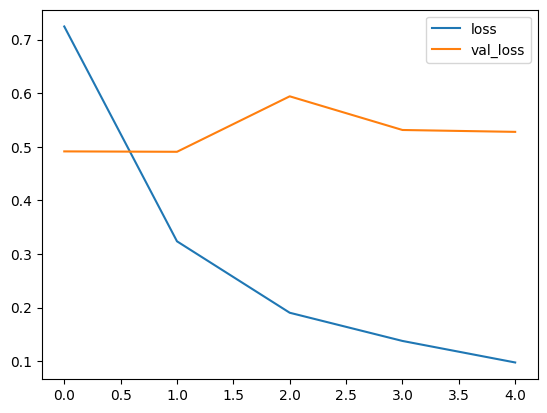

In [15]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

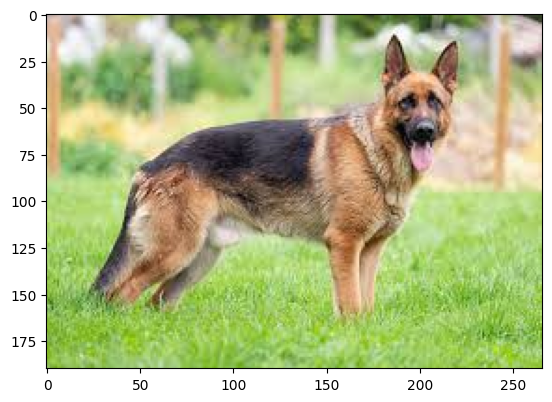

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicted class (Italian): cane
Translated class (English): dog


In [17]:
import cv2
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt


translate = {
    "cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly",
    "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep",
    "scoiattolo": "squirrel", "dog": "cane", "horse": "cavallo", "elephant": "elefante",
    "butterfly": "farfalla", "chicken": "gallina", "cat": "gatto", "cow": "mucca",
    "spider": "ragno", "squirrel": "scoiattolo"
}




def preprocess_image(image):
    image = cv2.resize(image, (256, 256))
    image = image.reshape((1, 256, 256, 3))
    image = image / 255.0
    return image


def predict_animal(image, model):
    processed_image = preprocess_image(image)
    prediction = model.predict(processed_image)
    predicted_class_index = np.argmax(prediction, axis=1)[0]


    class_labels = ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'scoiattolo', 'ragno']

    predicted_class = class_labels[predicted_class_index]


    translated_class = translate.get(predicted_class, "Unknown animal")

    return predicted_class, translated_class


image_path = '/content/dog.jpeg'
image = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


predicted_class, translated_class = predict_animal(image, model)


print(f"Predicted class (Italian): {predicted_class}")
print(f"Translated class (English): {translated_class}")


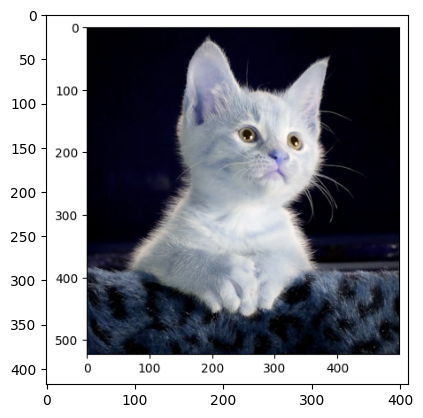

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted class (Italian): gatto
Translated class (English): cat


In [18]:
import cv2
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt


translate = {
    "cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly",
    "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep",
    "scoiattolo": "squirrel", "dog": "cane", "horse": "cavallo", "elephant": "elefante",
    "butterfly": "farfalla", "chicken": "gallina", "cat": "gatto", "cow": "mucca",
    "spider": "ragno", "squirrel": "scoiattolo"
}




def preprocess_image(image):
    image = cv2.resize(image, (256, 256))
    image = image.reshape((1, 256, 256, 3))
    image = image / 255.0
    return image


def predict_animal(image, model):
    processed_image = preprocess_image(image)
    prediction = model.predict(processed_image)
    predicted_class_index = np.argmax(prediction, axis=1)[0]


    class_labels = ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'scoiattolo', 'ragno']

    predicted_class = class_labels[predicted_class_index]


    translated_class = translate.get(predicted_class, "Unknown animal")

    return predicted_class, translated_class


image_path = '/content/cat.png'
image = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


predicted_class, translated_class = predict_animal(image, model)


print(f"Predicted class (Italian): {predicted_class}")
print(f"Translated class (English): {translated_class}")


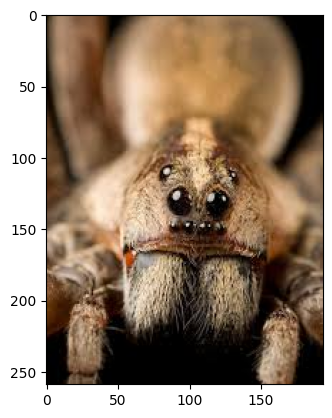

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class (Italian): ragno
Translated class (English): Unknown animal


In [19]:
import cv2
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt


translate = {
    "cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly",
    "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep",
    "scoiattolo": "squirrel", "dog": "cane", "horse": "cavallo", "elephant": "elefante",
    "butterfly": "farfalla", "chicken": "gallina", "cat": "gatto", "cow": "mucca",
    "spider": "ragno", "squirrel": "scoiattolo"
}




def preprocess_image(image):
    image = cv2.resize(image, (256, 256))
    image = image.reshape((1, 256, 256, 3))
    image = image / 255.0
    return image


def predict_animal(image, model):
    processed_image = preprocess_image(image)
    prediction = model.predict(processed_image)
    predicted_class_index = np.argmax(prediction, axis=1)[0]


    class_labels = ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'scoiattolo', 'ragno']

    predicted_class = class_labels[predicted_class_index]


    translated_class = translate.get(predicted_class, "Unknown animal")

    return predicted_class, translated_class


image_path = '/content/spider.jpeg'
image = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


predicted_class, translated_class = predict_animal(image, model)


print(f"Predicted class (Italian): {predicted_class}")
print(f"Translated class (English): {translated_class}")


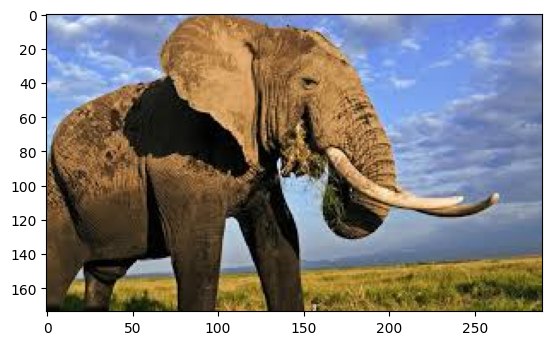

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted class (Italian): elefante
Translated class (English): elephant


In [20]:
import cv2
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt


translate = {
    "cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly",
    "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep",
    "scoiattolo": "squirrel", "dog": "cane", "horse": "cavallo", "elephant": "elefante",
    "butterfly": "farfalla", "chicken": "gallina", "cat": "gatto", "cow": "mucca",
    "spider": "ragno", "squirrel": "scoiattolo"
}




def preprocess_image(image):
    image = cv2.resize(image, (256, 256))
    image = image.reshape((1, 256, 256, 3))
    image = image / 255.0
    return image


def predict_animal(image, model):
    processed_image = preprocess_image(image)
    prediction = model.predict(processed_image)
    predicted_class_index = np.argmax(prediction, axis=1)[0]


    class_labels = ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'scoiattolo', 'ragno']

    predicted_class = class_labels[predicted_class_index]


    translated_class = translate.get(predicted_class, "Unknown animal")

    return predicted_class, translated_class


image_path = '/content/elephant.jpeg'
image = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


predicted_class, translated_class = predict_animal(image, model)


print(f"Predicted class (Italian): {predicted_class}")
print(f"Translated class (English): {translated_class}")


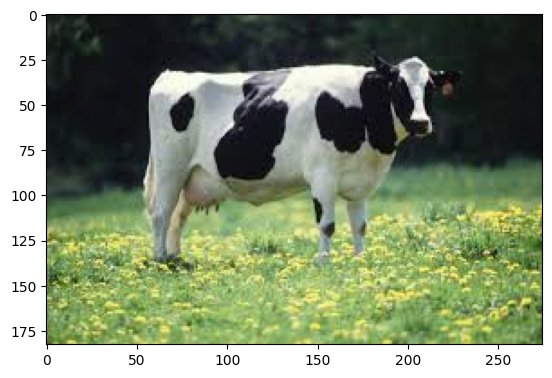

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Predicted class (Italian): mucca
Translated class (English): cow


In [21]:
import cv2
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt


translate = {
    "cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly",
    "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep",
    "scoiattolo": "squirrel", "dog": "cane", "horse": "cavallo", "elephant": "elefante",
    "butterfly": "farfalla", "chicken": "gallina", "cat": "gatto", "cow": "mucca",
    "spider": "ragno", "squirrel": "scoiattolo"
}



def preprocess_image(image):
    image = cv2.resize(image, (256, 256))
    image = image.reshape((1, 256, 256, 3))
    image = image / 255.0
    return image


def predict_animal(image, model):
    processed_image = preprocess_image(image)
    prediction = model.predict(processed_image)
    predicted_class_index = np.argmax(prediction, axis=1)[0]


    class_labels = ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'scoiattolo', 'ragno']

    predicted_class = class_labels[predicted_class_index]


    translated_class = translate.get(predicted_class, "Unknown animal")

    return predicted_class, translated_class

image_path = '/content/cow.jpeg'
image = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


predicted_class, translated_class = predict_animal(image, model)


print(f"Predicted class (Italian): {predicted_class}")
print(f"Translated class (English): {translated_class}")


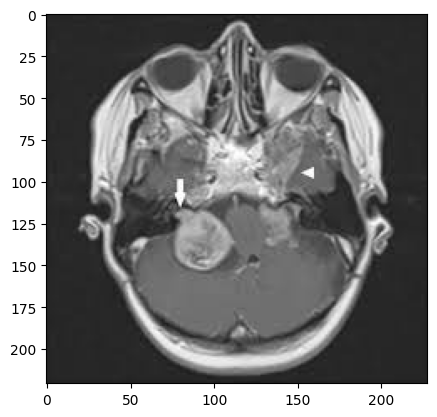

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted class (Italian): scoiattolo
Translated class (English): squirrel


In [22]:
import cv2
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt

translate = {
    "cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly",
    "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep",
    "scoiattolo": "squirrel", "dog": "cane", "horse": "cavallo", "elephant": "elefante",
    "butterfly": "farfalla", "chicken": "gallina", "cat": "gatto", "cow": "mucca",
    "spider": "ragno", "squirrel": "scoiattolo"
}




def preprocess_image(image):
    image = cv2.resize(image, (256, 256))
    image = image.reshape((1, 256, 256, 3))
    image = image / 255.0
    return image


def predict_animal(image, model):
    processed_image = preprocess_image(image)
    prediction = model.predict(processed_image)
    predicted_class_index = np.argmax(prediction, axis=1)[0]


    class_labels = ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'scoiattolo', 'ragno']

    predicted_class = class_labels[predicted_class_index]


    translated_class = translate.get(predicted_class, "Unknown animal")

    return predicted_class, translated_class


image_path = '/content/men.jpg'
image = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


predicted_class, translated_class = predict_animal(image, model)


print(f"Predicted class (Italian): {predicted_class}")
print(f"Translated class (English): {translated_class}")


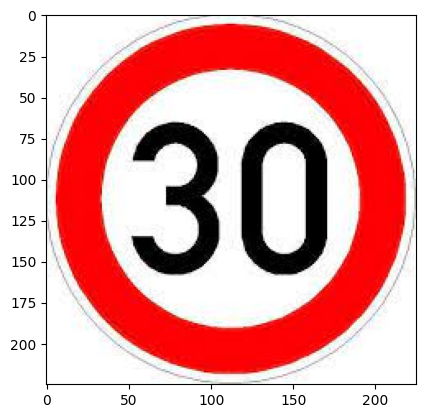

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class (Italian): cane
Translated class (English): dog


In [23]:
import cv2
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt


translate = {
    "cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly",
    "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep",
    "scoiattolo": "squirrel", "dog": "cane", "horse": "cavallo", "elephant": "elefante",
    "butterfly": "farfalla", "chicken": "gallina", "cat": "gatto", "cow": "mucca",
    "spider": "ragno", "squirrel": "scoiattolo"
}




def preprocess_image(image):
    image = cv2.resize(image, (256, 256))
    image = image.reshape((1, 256, 256, 3))
    image = image / 255.0
    return image


def predict_animal(image, model):
    processed_image = preprocess_image(image)
    prediction = model.predict(processed_image)
    predicted_class_index = np.argmax(prediction, axis=1)[0]


    class_labels = ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'scoiattolo', 'ragno']

    predicted_class = class_labels[predicted_class_index]


    translated_class = translate.get(predicted_class, "Unknown animal")

    return predicted_class, translated_class


image_path = '/content/w2.jpeg'
image = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


predicted_class, translated_class = predict_animal(image, model)


print(f"Predicted class (Italian): {predicted_class}")
print(f"Translated class (English): {translated_class}")


In [24]:
model.save('animal_classifier_model.h5')